<a href="https://colab.research.google.com/github/yashveersinghsohi/Competitions/blob/car-price/EDA_Preprocessing/CarPrice_00_Preliminary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter

# Data

In [2]:
root_dir = "https://raw.githubusercontent.com/yashveersinghsohi/Competitions/car-price/CarPrice/Data/"
train_path = root_dir + "train.csv"
test_path = root_dir + "test.csv"
submission_path = root_dir + "submission.csv"

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

# Preliminary EDA

## Data dimensions

Shape of dataframes

In [4]:
train_df.shape, test_df.shape

((19237, 18), (8245, 18))

Comparing column names

In [5]:
train_df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [6]:
test_df.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

Train and test dataframes have the same columns names. Including Price

In [7]:
set(train_df.columns) == set(test_df.columns)

True

All the values in Price column are NAN for test dataframe

In [8]:
test_df["Price"].isnull().sum()

8245

## Column Data Types

Data types of columns

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


Numerical and Object data type columns.

In [11]:
num_features = ["Prod. year", "Cylinders", "Airbags"]
obj_features = ["Levy", "Manufacturer", "Model", 
                "Category", "Leather interior", 
                "Fuel type", "Engine volume", "Mileage", 
                "Gear box type", "Drive wheels", "Doors", 
                "Wheel", "Color"]
target_features = ["Price"]

In [12]:
train_df[num_features].describe()

,Prod. year,Cylinders,Airbags
count,19237.000000,19237.000000,19237.000000
mean,2010.912824,4.582991,6.582627
std,5.668673,1.199933,4.320168
min,1939.000000,1.000000,0.000000
25%,2009.000000,4.000000,4.000000
50%,2012.000000,4.000000,6.000000
75%,2015.000000,4.000000,12.000000
max,2020.000000,16.000000,16.000000


In [13]:
test_df[num_features].describe()

,Prod. year,Cylinders,Airbags
count,8245.000000,8245.000000,8245.000000
mean,2010.911583,4.618799,6.519102
std,5.548762,1.817581,4.350323
min,1943.000000,1.000000,0.000000
25%,2009.000000,4.000000,4.000000
50%,2012.000000,4.000000,6.000000
75%,2014.000000,4.000000,12.000000
max,2020.000000,127.000000,16.000000


# Splitting data

In [14]:
train_og = train_df.copy()
features = train_df[num_features+obj_features]
targets = train_df[target_features]

In [15]:
features.shape, targets.shape

((19237, 16), (19237, 1))

In [16]:
train_features, val_features, train_targets, val_targets = train_test_split(
                                                              features, targets, 
                                                              random_state=42, 
                                                              test_size=0.2
                                                            )
train_features.shape, val_features.shape, train_targets.shape, val_targets.shape

((15389, 16), (3848, 16), (15389, 1), (3848, 1))

# EDA

## Univariate EDA

### Numerical data types

In [17]:
num_features

['Prod. year', 'Cylinders', 'Airbags']

#### Prod. year

Number of records for each year

In [23]:
(train_features["Prod. year"].value_counts().sort_index()/train_features["Prod. year"].shape[0]) * 100

1939     0.019494
1953     0.019494
1957     0.006498
1964     0.012996
1965     0.006498
1968     0.006498
1973     0.006498
1974     0.012996
1976     0.006498
1977     0.006498
1978     0.006498
1980     0.012996
1981     0.006498
1982     0.006498
1983     0.019494
1984     0.025993
1985     0.025993
1986     0.038989
1987     0.019494
1988     0.051985
1989     0.032491
1990     0.090974
1991     0.064981
1992     0.149457
1993     0.103970
1994     0.188446
1995     0.571837
1996     0.591331
1997     0.734291
1998     1.137176
1999     1.000715
2000     1.488076
2001     1.306128
2002     1.559556
2003     1.864968
2004     1.910456
2005     2.046917
2006     1.605043
2007     2.488791
2008     3.846904
2009     3.054130
2010     7.797778
2011     8.174670
2012    11.241796
2013    10.176100
2014    11.105335
2015     8.096692
2016     7.823770
2017     4.880109
2018     2.696731
2019     1.611541
2020     0.240431
Name: Prod. year, dtype: float64

Bar graph showing number of records observed each year.

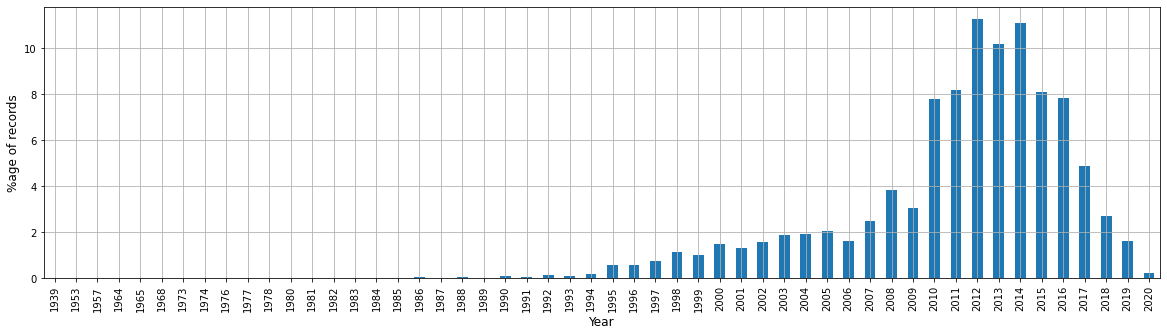

In [24]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_series = (train_features["Prod. year"].value_counts().sort_index()/train_features["Prod. year"].shape[0]) * 100
temp_series.plot.bar(ax=ax)

ax.grid()
ax.set_xlabel("Year", size=12)
ax.set_ylabel("%age of records", size=12)
plt.show()

Paraeto graph

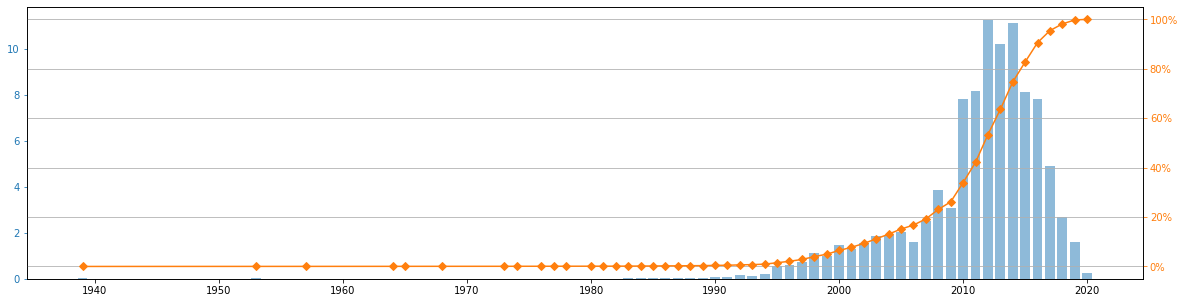

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_series = (train_features["Prod. year"].value_counts().sort_index()/train_features["Prod. year"].shape[0]) * 100

# Bar Plot
ax.bar(temp_series.index, temp_series.to_numpy(), alpha=0.5)

# Paraeto Graph
ax2 = ax.twinx()
ax2.plot(temp_series.cumsum(), color="C1", marker="D")

ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="C1")
ax.tick_params(axis="y", colors="C0")

ax2.grid()
plt.show()

Checking the min and max values in validation and test sets

In [26]:
val_features["Prod. year"].min(), val_features["Prod. year"].max()

(1943, 2020)

In [27]:
test_df["Prod. year"].min(), test_df["Prod. year"].max()

(1943, 2020)

#### Cylinders

Number of cars with each category of `Cylinders`

In [39]:
temp_series = train_features["Cylinders"].value_counts().sort_index()

temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features["Cylinders"].shape[0])*100
      ], 
  columns=["Cylinders", "Value_Counts", "%age_Value_Counts"])
temp_df

,Cylinders,Value_Counts,%age_Value_Counts
0,1.0,30.0,0.194944
1,2.0,37.0,0.240431
2,3.0,85.0,0.552343
3,4.0,11503.0,74.748197
4,5.0,132.0,0.857756
5,6.0,2766.0,17.973877
6,7.0,3.0,0.019494
7,8.0,792.0,5.146533
8,10.0,10.0,0.064981
9,12.0,26.0,0.168952


Bar graphs for number of cars of each `Cylinders` category

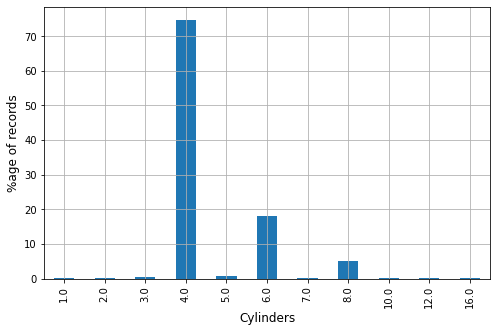

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_Counts"].plot.bar(ax=ax)

ax.grid()
ax.set_xticklabels(temp_df["Cylinders"])
ax.set_xlabel("Cylinders", size=12)
ax.set_ylabel("%age of records", size=12)
plt.show()

Checking for consistency in val and test sets

In [114]:
val_features["Cylinders"].min(), val_features["Cylinders"].max()

(1.0, 14.0)

In [115]:
test_df["Cylinders"].min(), test_df["Cylinders"].max()

(1, 127)

In [120]:
test_df["Cylinders"].value_counts().sort_index()

1        14
2        17
3        54
4      6115
5        68
6      1473
7         4
8       474
9         1
10        6
11        1
12       16
15        1
127       1
Name: Cylinders, dtype: int64

#### Airbags

Value Counts

In [50]:
temp_series = train_features["Airbags"].value_counts().sort_index()

temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ], 
  columns = ["Airbags", "Value_COunts", "%age_Value_Counts"]
)
temp_df

,Airbags,Value_COunts,%age_Value_Counts
0,0.0,1950.0,12.671389
1,1.0,64.0,0.415881
2,2.0,838.0,5.445448
3,3.0,31.0,0.201443
4,4.0,4665.0,30.313861
5,5.0,85.0,0.552343
6,6.0,1016.0,6.602118
7,7.0,76.0,0.493859
8,8.0,1290.0,8.382611
9,9.0,52.0,0.337904


Bar graph

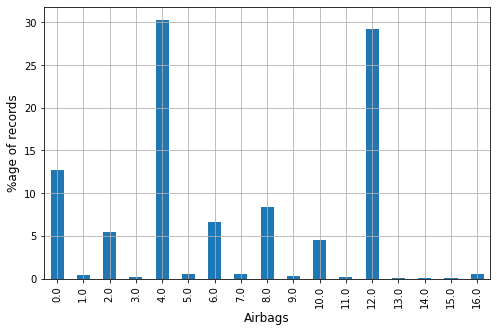

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))
temp_df["%age_Value_Counts"].plot.bar(ax=ax)

ax.grid()
ax.set_xticklabels(temp_df["Airbags"])
ax.set_xlabel("Airbags", size=12)
ax.set_ylabel("%age of records", size=12)
plt.show()

Checking for consistency in val and test sets

In [111]:
val_features["Airbags"].min(), val_features["Airbags"].max()

(0, 16)

In [112]:
test_df["Airbags"].min(), test_df["Airbags"].max()

(0, 16)

### Object Data Type

In [54]:
obj_features

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

#### Levy

Number of Null values in this column. Here the Null values are given by `"-"` sign.

In [59]:
train_features[train_features["Levy"] == "-"].shape

(4632, 16)

%age of Null values

In [62]:
(train_features[train_features["Levy"] == "-"].shape[0]/train_features.shape[0])*100

30.099421664825528

Removing Null values

In [64]:
temp_df = pd.DataFrame(
  train_features[train_features["Levy"] != "-"]["Levy"].astype(np.uint), 
  columns=["Levy"]
)
print(temp_df.shape)
temp_df.head()

(10757, 1)


,Levy
7808,779
16766,1282
7285,1399
15712,642
9341,394


Histogram and Box Plots

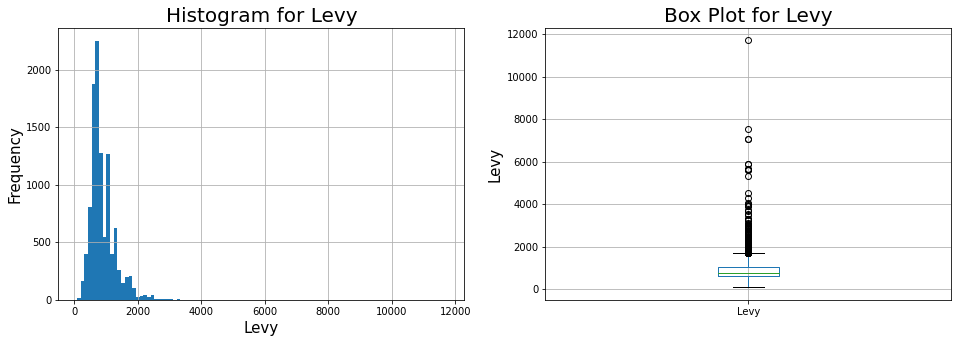

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
temp_df["Levy"].plot.hist(ax=ax[0], bins=100)
ax[0].set_xlabel("Levy", size=15)
ax[0].set_ylabel("Frequency", size=15)
ax[0].set_title("Histogram for Levy", size=20)
ax[0].grid()

temp_df[["Levy"]].boxplot(ax=ax[1])
ax[1].set_ylabel("Levy", size=15)
ax[1].set_title("Box Plot for Levy", size=20)
plt.show()

#### Manufacturer

In [78]:
train_features["Manufacturer"].unique()

array(['TOYOTA', 'CHEVROLET', 'MERCEDES-BENZ', 'BMW', 'LEXUS', 'HONDA',
       'FORD', 'DAEWOO', 'HYUNDAI', 'SSANGYONG', 'VOLKSWAGEN', 'SUBARU',
       'SUZUKI', 'FIAT', 'NISSAN', 'OPEL', 'KIA', 'ALFA ROMEO',
       'MITSUBISHI', 'JEEP', 'DODGE', 'MAZDA', 'CADILLAC', 'VAZ',
       'LAND ROVER', 'AUDI', 'RENAULT', 'SKODA', 'PORSCHE', 'CHRYSLER',
       'JAGUAR', 'MINI', 'LINCOLN', 'ACURA', 'HUMMER', 'DAIHATSU', 'UAZ',
       'BUICK', 'SCION', 'CITROEN', 'INFINITI', 'GMC', 'GAZ', 'PEUGEOT',
       'VOLVO', 'TESLA', 'SEAT', 'ASTON MARTIN', 'ROVER', 'LAMBORGHINI',
       'ISUZU', 'BENTLEY', 'HAVAL', 'ROLLS-ROYCE', 'MERCURY', 'MASERATI',
       'SAAB', 'სხვა', 'MOSKVICH', 'ZAZ', 'FERRARI', 'SATURN', 'PONTIAC',
       'GREATWALL'], dtype=object)

In [87]:
temp_series = train_features["Manufacturer"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ],
  columns=["Manufacturer", "Value_counts", "%age_Value_counts"]
)
print(temp_df.shape)
temp_df.head()

(64, 3)


,Manufacturer,Value_counts,%age_Value_counts
0,HYUNDAI,3026,19.6634
1,TOYOTA,2934,19.0656
2,MERCEDES-BENZ,1688,10.9689
3,FORD,887,5.76386
4,CHEVROLET,863,5.6079


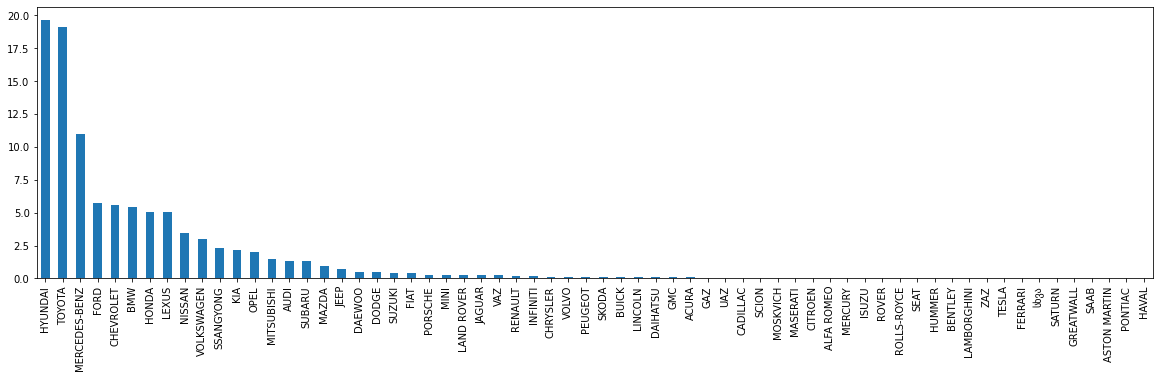

In [86]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_df["%age_Value_counts"].plot.bar(ax=ax)
ax.set_xticklabels(temp_df["Manufacturer"])
plt.show()

Does the train set contain all the car manufacturers in the val and test sets?

- Validation set

In [90]:
len(val_features["Manufacturer"].unique())

51

In [92]:
set(val_features["Manufacturer"].unique()).difference(
    set(train_features["Manufacturer"].unique())
  )

{'LANCIA'}

In [100]:
val_features[val_features["Manufacturer"] == "LANCIA"].shape

(1, 16)

- Test set

In [93]:
len(test_df["Manufacturer"].unique())

62

In [95]:
set(test_df["Manufacturer"].unique()).difference(
    set(train_df["Manufacturer"].unique())
  )

{'FOTON', 'MG', 'TATA'}

In [107]:
idx = test_df["Manufacturer"].isin(["FOTON", "MG", "TATA"])
test_df.loc[idx, :].shape

(3, 18)

#### Model

In [126]:
train_features["Model"].head()

7808       Camry
16766    Captiva
7285       E 350
15712    Orlando
16562         X5
Name: Model, dtype: object

In [125]:
train_features["Model"].nunique()

1402

In [127]:
temp_series = train_features["Model"].value_counts()
temp_df = pd.DataFrame(
  np.c_[
        temp_series.index, 
        temp_series.to_numpy(), 
        (temp_series.to_numpy()/train_features.shape[0])*100
  ],
  columns=["Model", "Value_counts", "%age_Value_counts"]
)
print(temp_df.shape)
temp_df.head()

(1402, 3)


,Model,Value_counts,%age_Value_counts
0,Sonata,872,5.66639
1,Prius,867,5.63389
2,Camry,754,4.8996
3,Elantra,728,4.73065
4,E 350,442,2.87218


Bar graph for some of the most common models (>1% occurance)

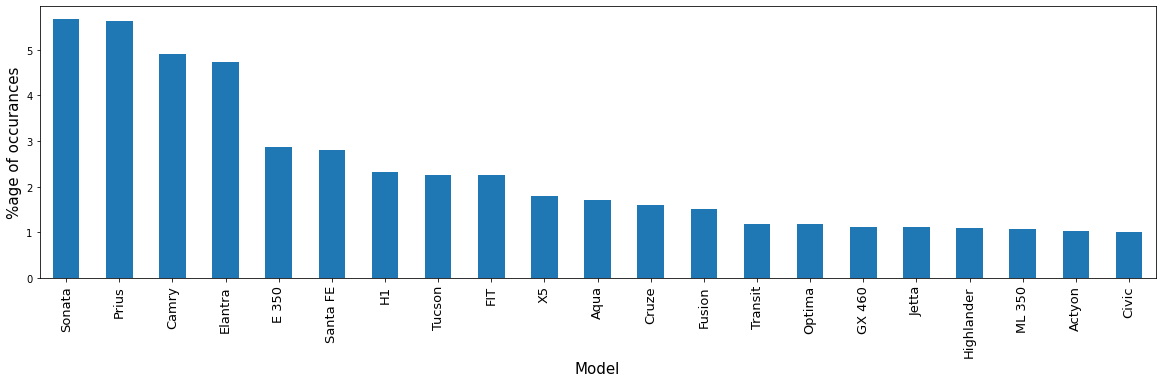

In [131]:
fig, ax = plt.subplots(figsize=(20, 5))
temp_df[temp_df["%age_Value_counts"]>1]["%age_Value_counts"].plot.bar(ax=ax)

ax.set_xlabel("Model", size=15)
ax.set_ylabel("%age of occurances", size=15)
ax.set_xticklabels(temp_df["Model"], fontdict={"fontsize": 13})
plt.show()

Does the train set contain all the car manufacturers in the val and test sets?

- Validation set

In [132]:
len(val_features["Model"].unique())

621

In [134]:
len(set(val_features["Model"].unique()).difference(
    set(train_features["Model"].unique())
  ))

188

- Test set

In [136]:
len(test_df["Model"].unique())

995

In [137]:
len(set(test_df["Model"].unique()).difference(
    set(train_df["Model"].unique())
  ))

391

#### Category

In [140]:
train_features["Category"].value_counts()

Sedan          7007
Jeep           4364
Hatchback      2270
Minivan         526
Coupe           418
Universal       287
Microbus        246
Goods wagon     194
Pickup           40
Cabriolet        28
Limousine         9
Name: Category, dtype: int64

# Notes

**Preliminary EDA**
- Data has no NAN values in train or test. Need to check whether NANs are represented as dashes or strings.

**EDA for each column**

Data is split using train_test_split into train and val sets (80-20 split). All EDA done on train set only

- Numerical Data Types
  1. `Prod. year`: Most of the data points come from 2010-2017
  2. `Cylinders`: Convert this to `int` from `float`. Most of the cars have 4 cylinders (>74%), so might not be very useful. Could be used as a categorical feature. There is a big outlier in the test set.
  3. `Airbags`: Convert this to `int` from `float`. Not as unbalanced as `Cylinders`. From simple intuition, having more `Cylinders` or `Airbags` seem like factors that can make a car more expensive. Explore this theory in bivariate exploration.

- Object Data Type
  1. `Levy`: Normally distributed but extremely right skewed. 30% values are Null (`"-"`). Find suitable imputation methods for the Null values. High `Levy` intuitively means high price, so maybe outlier removal should not be used here. Explore the approach anyway.
  2. `Manufacturer`: There are 64 manufacturers. Most of them are highly uncommon. Try to split these into a few categories like common-uncommon, cheap-expensive, etc. instead of using all 64 categories as is. 1 manufacturer in validation set and 3 manufacturers in test set are not in train set. All these have only 1 row each.
  3. `Model`: There are plenty of models. Some are common. Most are rare. Validation and test sets also have many models that are not in train sets. Categories like common-uncommon should be used here mostly.
